# REPORT - Wine Quality Data Set
___

<table><tr>
<td> <img src="https://media-exp1.licdn.com/dms/image/C4E12AQEA3UO8eGuOng/article-cover_image-shrink_720_1280/0/1564939206902?e=2147483647&v=beta&t=vsuxXm2_StCglTC7rBq1IqEQIad3eWIWbce2yMx8OB0"alt="Drawing" style="width:370px;"/> </td>
<td> <img src="https://luxebeatmag.com/wp-content/uploads/2015/10/Wine-Folly-tastings.jpg" alt="Drawing" style="width: 167px;"/> </td>
<td> <img src="https://i0.wp.com/wineandotherstories.com/wp-content/uploads/2019/10/quality-in-wine.jpg?resize=418%2C345&ssl=1" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

##### **Introduction**:

In 2021, worldwide wine consumption was estimated to amount to 236 million hectoliters making it one of the biggest markets in the world (Jan Conway 2022). Wine enthusiasts frequently experiment with wines through wine tasting as well as food and wine pairing, both at home and while dining out. Additionally, they choose to purchase wines directly from wineries or from retailers. While sellers must place heavy emphasis on marketing their wine quality to properly sell their product, consumers of these wine products should also have a tool to accurately determine the quality of product without the need of immense background knowledge. With the massive size of the wine industry, and the diverse reach it has over the population, more and more people are finding themselves in the position of buying wine. Due to this increase in demand we realized that although the average day-to-day consumer of wine might not place great importance on knowing the exact quality of wine they are buying, the ability to do so will only help consumers in making better decisions. In addition to this, a method that could accurately predict wine quality would have many more applications in the field of wine science. These include being able to use consistent algorithmic models to predict wine quality rather than relying on wine tasters, improving the scientific study of wine, and making the wine quality itself better. The focus of this project will be on looking to equip consumers with the ability to predict the quality of wine. The problem is that most average wine consumers are not connoisseurs and may not even fully comprehend the parameters of grading a wine sample’s quality due to the numerous factors seemingly present. Our project report aims to grade the quality of different samples of red wine on a numeric scale as defined by Cortez et al. (2009) with 0 being poor quality and 10 being excellent quality of wine, but more specifically we want to see if we can accurately predict red wine quality given only a few relevant predictors. By limiting the predictors and therefore the factored ingredients, we want to see if consumers can have a better idea of grading a sample of wine’s quality without needing to know an excessive amount of information. To carry out this procedure we decided to use the “Wine Quality Data Set” by Cortez et al. (2009), composed of numerous observations of red wine. The dataset displays 11 columns each containing the quantities of their respective ingredients with a final column being used to show the wine quality score given. Cortez et al. (2009) explain that although all ingredients within a quantity of wine are important when looking to grade the quality, they are not of equal relevance. Using their model we can see that there are certain ingredients present in a sample of wine that when increased or decreased in quantity, will have a higher impact on the overall wine’s quality. We will predict the wine quality from the dataset mentioned above by using the four most relevant ingredients in red wine which according to their study (Cortez et al. 2009) are sulphates, pH, total sulfur dioxide and alcohol.


#### Preliminary exploratory data analysis:
___

In [1]:
# load the libraries
library(repr)
library(tidyverse)
library(tidymodels)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

**Read the dataset from the web**,
<br> randomly select 10 rows to observe the dataframe.

In [2]:
wine_data <- read_csv2("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv") 
slice_sample(wine_data, n = 10)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (5): volatile acidity, citric acid, chlorides, density, sulphates
dbl (2): total sulfur dioxide, quality

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
79,0.4,0.29,18,0.157,1,44,0.9973,33,0.92,95,6
77,0.58,0.1,18,0.102,28,109,0.99565,308,0.49,98,6
73,0.38,0.21,2,0.08,7,35,0.9961,333,0.47,95,5
7,0.22,0.3,18,0.065,16,20,0.99672,361,0.82,10,6
9,0.82,0.14,26,0.089,9,23,0.9984,339,0.63,98,5
81,0.73,0,25,0.081,12,24,0.99798,338,0.46,96,4
68,0.64,0,27,0.123,15,33,0.99538,344,0.63,113,6
155,0.645,0.49,42,0.095,10,23,1.00315,292,0.74,111,5
75,0.71,0,16,0.092,22,31,0.99635,338,0.58,10,6


**In our dataset, we can see there are only 2 rows that have missing data. We choose to remove these incomplete cases from the dataframe using `na.omit`.**

In [3]:
wine_data[!complete.cases(wine_data),]
wine_data <- na.omit(wine_data)

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
66,0.63,0,43,0.093,51,NA,0.99558,32,0.45,95,5
66,0.63,0,43,0.093,51,NA,0.99558,32,0.45,95,5


**In addition, we use `make.names` to replace column names that contain empty spaces with a `.`. This will allow us use our tidyverse functions more conveniently.**

In [4]:
colnames(wine_data) <- make.names(colnames(wine_data))
slice(wine_data, 1)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
74,0.7,0,19,0.076,11,34,0.9978,351,0.56,94,5


**Based on our introduction, we will select the columns of which are the four most relevant factors in determining the quality for red wine.**

In [5]:
wine_data <- select(wine_data, sulphates, pH, total.sulfur.dioxide, alcohol, quality)
slice_sample(wine_data, n = 5)

sulphates,pH,total.sulfur.dioxide,alcohol,quality
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0.6,348,87,97,6
0.65,335,23,102,7
0.54,336,54,101,5
0.49,316,27,94,5
0.46,326,67,92,5


**We then used `mutate` to convert all predictors into numeric data; and convert target variable to factors using `as_factor`.**

In [6]:
wine_data <- wine_data |> 
  mutate(across(sulphates:alcohol, as.numeric)) |>
  mutate(quality = as_factor(quality))
slice(wine_data, 1)

sulphates,pH,total.sulfur.dioxide,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.56,351,34,94,5


**We can also use `boxplot` to check for any outliers in our data.**
<br> We observed that the alcohol column contains a few unrealistic high values that are unsuitable for data analysis.

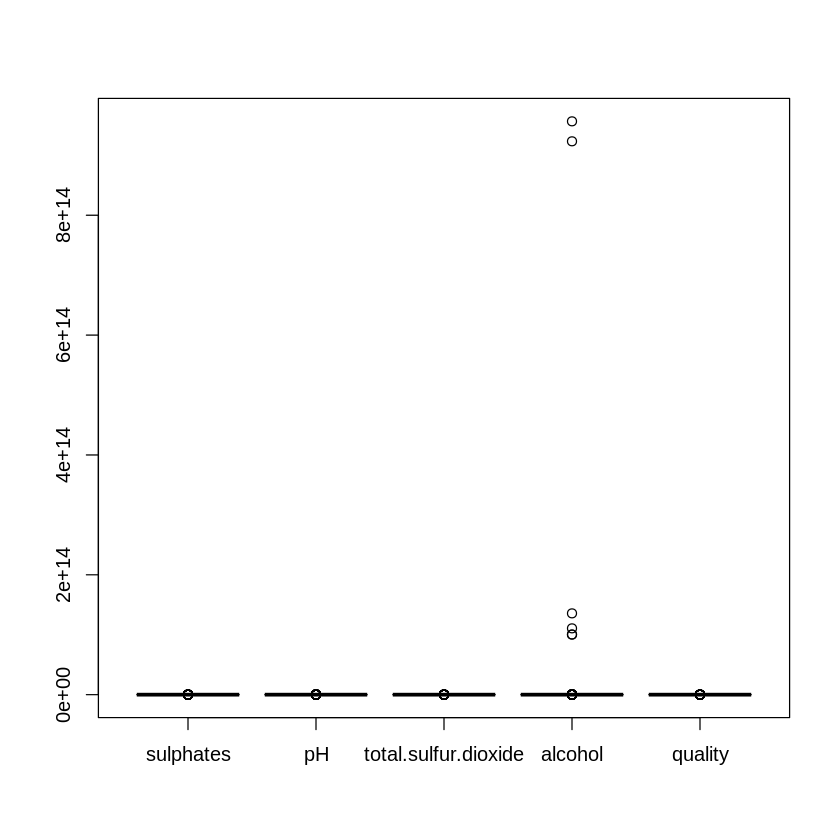

In [7]:
boxplot(wine_data)

**Using the percentiles method, we removed the rows that contain outliers from our dataset.**

In [8]:
print("Before:")
dim(wine_data)

# We considered outliers as observations that lie outside the interval formed by the 20 and 80 percentiles
quartiles <- quantile(wine_data$alcohol, probs=c(.20, .80), na.rm = FALSE)
IQR <- IQR(wine_data$alcohol)
 
Lower <- quartiles[1] - 1.5*IQR
Upper <- quartiles[2] + 1.5*IQR 
 
wine_data <- subset(wine_data, wine_data$alcohol > Lower & wine_data$alcohol < Upper)
print("After:")
dim(wine_data)

[1] "Before:"


[1] 1597    5

[1] "After:"


[1] 1387    5

**After tidying our data to a format that is suitable for analysis, we continue to next step by 
focusing specifically on the training data.**
<br> We choose to split 75% of our original data set into the training set.

In [9]:
set.seed(1)

wine_split <- initial_split(wine_data, prop = 0.75, strata = quality)  
wine_train <- training(wine_split)   
wine_test <- testing(wine_split)

**Since all of the predictor variables contains quantitaive data, we use `group_by` to separate each class label, and find the mean of each predictor variable under each class label using `summarize` + `across`.**

In [10]:
wine_train_avg <- wine_train |> 
  group_by(quality) |>
  summarize(across(sulphates:alcohol, mean))

wine_train_avg

quality,sulphates,pH,total.sulfur.dioxide,alcohol
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
3,0.6180000,336.0000,31.20000,97.00000
4,0.6053333,294.4667,34.60000,102.30000
5,0.6227332,295.3753,57.56833,98.50976
6,0.6692736,301.8935,40.73608,106.20581
7,0.7277686,311.1736,34.04959,114.66942
8,0.7700000,294.3333,33.44444,122.22222


**We can also find the mean of all predictor variables.**

In [11]:
wine_train_avg2 <- wine_train |> 
summarize(across(sulphates:alcohol, mean))

wine_train_avg2

sulphates,pH,total.sulfur.dioxide,alcohol
<dbl>,<dbl>,<dbl>,<dbl>
0.6542156,299.9663,47.13956,103.7584


**Next, use `group_by` + `summarize` to find out the distribution of each of our target variable (quality).**

In [12]:
target <- wine_train |>
    group_by(quality) |>
    summarize(n = n())
target

quality,n
<fct>,<int>
3,5
4,30
5,461
6,413
7,121
8,9


**We can also use a bar graph to plot the distribution:**

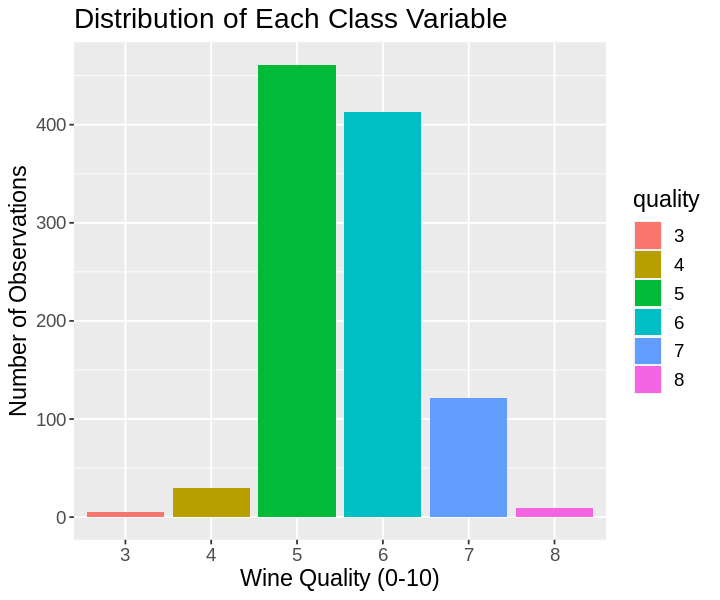

In [13]:
options(repr.plot.width = 6, repr.plot.height = 5)

plot <- ggplot(target, aes(x = quality, y = n, fill = quality)) +
  geom_bar(stat = "identity") +
  labs(x = "Wine Quality (0-10)", y = "Number of Observations") +
  ggtitle("Distribution of Each Class Variable") +
  theme(text = element_text(size = 14))
plot

A potential issue in our data set for a classifier is class imbalance, since the label 5 and 6 are much more common than other classes. Thus, we will add an oversampling step to the recipe with the `step_upsample` function from the `themis` R package. By oversampling the rare classes, we can give them more voting power to in the K-nearest neighbor algorithm.

In [14]:
install.packages("themis") #install and load package
library(themis)

wine_recipe <- recipe(quality ~ ., wine_train) |>
  step_upsample(quality, over_ratio = 1, skip = FALSE) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors()) |>
  prep()
wine_recipe

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



Recipe

Inputs:

      role #variables
   outcome          1
 predictor          4

Training data contained 1039 data points and no missing data.

Operations:

Up-sampling based on quality [trained]
Scaling for sulphates, pH, total.sulfur.dioxide, alcohol [trained]
Centering for sulphates, pH, total.sulfur.dioxide, alcohol [trained]

**Now each class shares equal distribution in the overall dataset with 461 observations each.**

In [15]:
upsampled_wine <- bake(wine_recipe, wine_train)

upsampled_wine |>
  group_by(quality) |>
  summarize(n = n())

quality,n
<fct>,<int>
3,461
4,461
5,461
6,461
7,461
8,461


**To visualize graphically:**

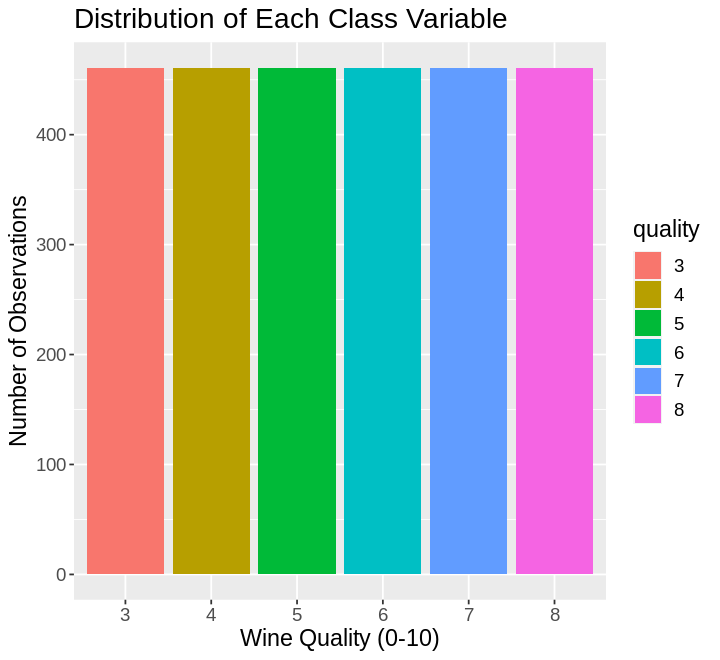

In [16]:
options(repr.plot.width = 6, repr.plot.height = 5.5)

upsampled_wine  |>
  ggplot(aes(quality, fill = quality)) +
  geom_bar() +
  labs(x = "Wine Quality (0-10)", y = "Number of Observations") +
  ggtitle("Distribution of Each Class Variable") +
  theme(text = element_text(size = 14))

### VISUALIZATION
___

**Now we can compare the distributions of each of the `predictor variables vs. quality` by graphing jitterplots.**

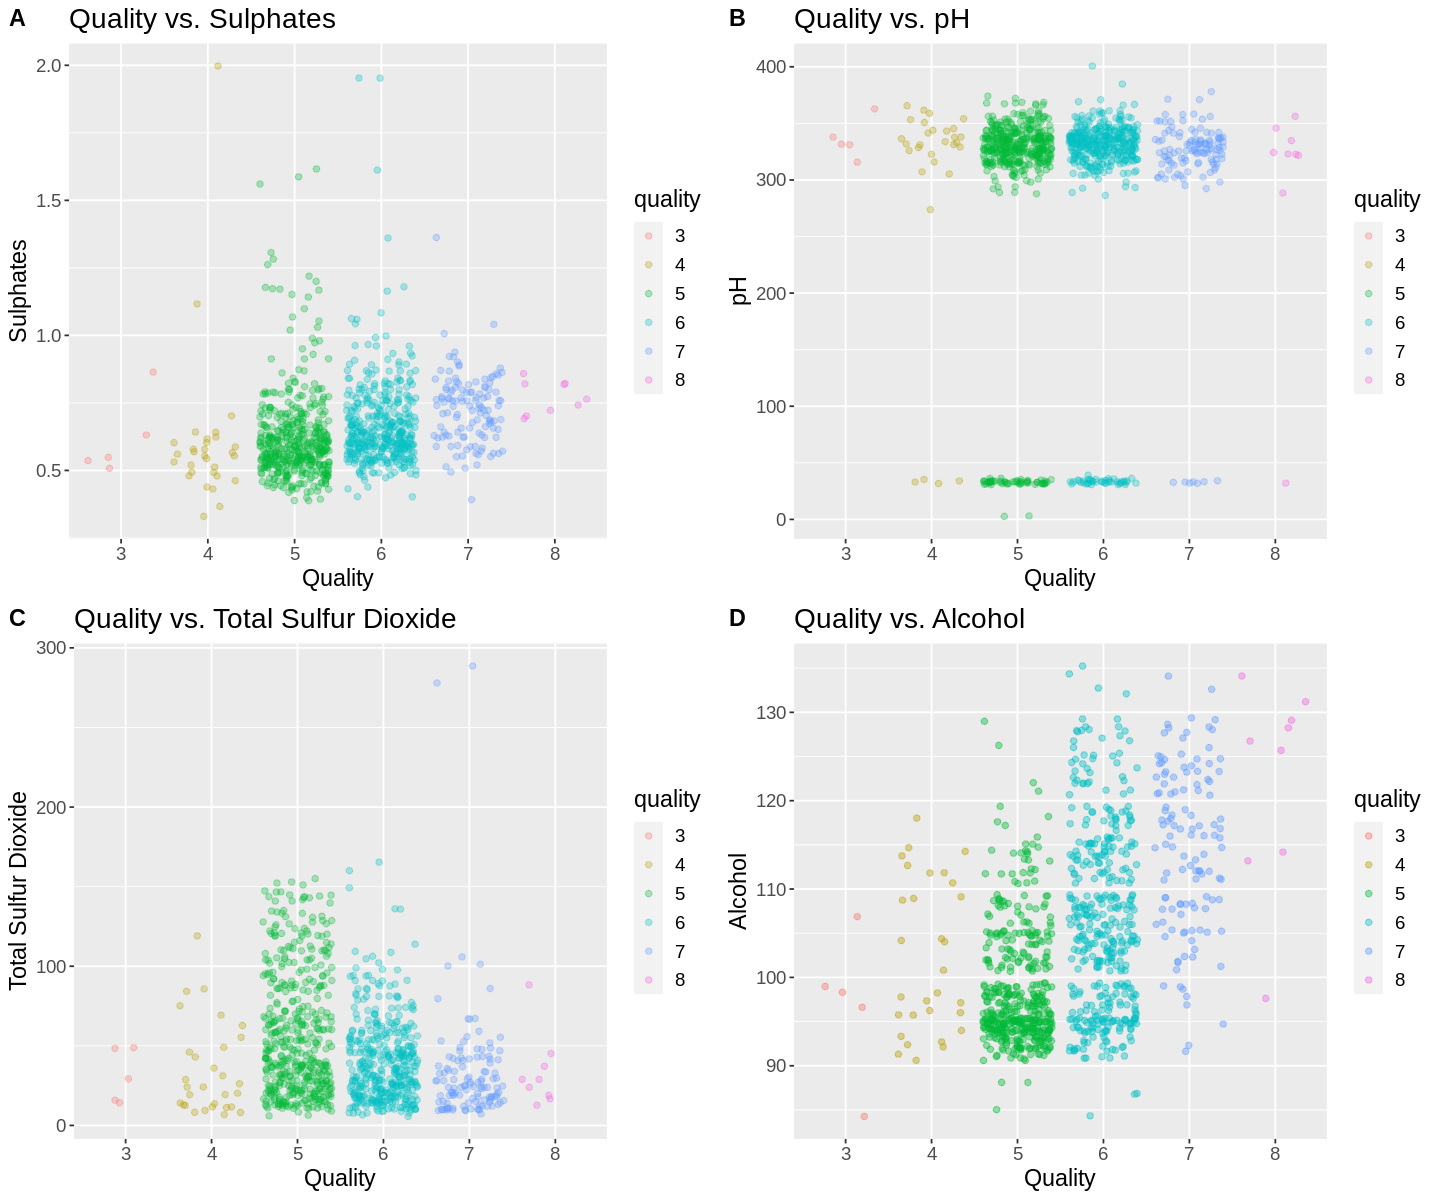

In [17]:
# quality vs. sulphates
graph <- ggplot(wine_train, aes(x = quality, y = sulphates, color = quality)) +
geom_jitter(alpha = 0.3) +
xlab("Quality") +
ylab("Sulphates") +
ggtitle("Quality vs. Sulphates") +
theme(text = element_text(size = 14))

# quality vs. pH
graph1 <- ggplot(wine_train, aes(x = quality, y = pH, color = quality)) +
geom_jitter(alpha = 0.3) +
xlab("Quality") +
ylab("pH") +
ggtitle("Quality vs. pH") +
theme(text = element_text(size = 14))

# quality vs. total sulfur dioxide
graph2 <- ggplot(wine_train, aes(x = quality, y = total.sulfur.dioxide, color = quality)) +
geom_jitter(alpha = 0.3) +
xlab("Quality") +
ylab("Total Sulfur Dioxide")+
ggtitle("Quality vs. Total Sulfur Dioxide") +
theme(text = element_text(size = 14))

# quality vs. alcohol
graph3 <- ggplot(wine_train, aes(x = quality, y = alcohol, color = quality)) +
geom_jitter(alpha = 0.4) +
xlab("Quality") +
ylab("Alcohol") +
ggtitle("Quality vs. Alcohol") +
theme(text = element_text(size = 14))

# COMBINED 
options(repr.plot.width = 12, repr.plot.height = 10)
plot_grid(graph, graph1, graph2, graph3, 
          labels = c("A", "B", "C", "D"), 
          ncol = 2, nrow = 2)

From the scatterplots above, we can observe the distribution of each predictor variables that falls in each class, as well as a general relationship between predictors and the level of wine quality. For example, predictors such as sulphates and total sulphur dioxide have less varied data and more clustered data points, while the pH in red wine can be separated as two different groups, with one group outnumbering the other. However, both groups contains data in different wine qualities. Due to class imbalance it would be more difficult to analyze the graphs visually, but we are able to observe from graph A and D that wines with higher sulphates and higher alcohol are more favored and have generally higher quality level. 

### DATA ANALYSIS
___

Now our data is clean and ready to perform classification based on our previously splitted training and testing datasets.

In [18]:
set.seed(1)

## Prepare the recipe using upsampled training data and preprocess all variables ##
upsampled_wine_recipe <- recipe(quality ~ ., data = upsampled_wine) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

## Create nearest_neighbor model specification with neighbors undetermined ##
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

## 5 validation sets splitted from training data ##
wine_vfold <- vfold_cv(wine_train, v = 5, strata = quality)

## test for 20 neighbors (K) ##
gridvals <- tibble(neighbors = seq(1, 20))

## Perform 5-fold cross-validation to estimate the classifier accuracy for different K values ##
wine_results <- workflow() |>
  add_recipe(upsampled_wine_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = wine_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "accuracy")
wine_results    

! Fold1: internal:
  No observations were detected in `truth` for level(s): '3'
  Computation will proceed by ignoring those levels.

! Fold4: internal:
  No observations were detected in `truth` for level(s): '3'
  Computation will proceed by ignoring those levels.



neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.5765577,5,0.013426768,Preprocessor1_Model01
2,accuracy,multiclass,0.5765577,5,0.013426768,Preprocessor1_Model02
3,accuracy,multiclass,0.5726424,5,0.010463512,Preprocessor1_Model03
4,accuracy,multiclass,0.5726516,5,0.010913274,Preprocessor1_Model04
5,accuracy,multiclass,0.5659990,5,0.012392468,Preprocessor1_Model05
6,accuracy,multiclass,0.5746024,5,0.005685148,Preprocessor1_Model06
7,accuracy,multiclass,0.5764519,5,0.007169893,Preprocessor1_Model07
8,accuracy,multiclass,0.5783751,5,0.008042652,Preprocessor1_Model08
9,accuracy,multiclass,0.5726286,5,0.007191417,Preprocessor1_Model09


[1] 0.5899924

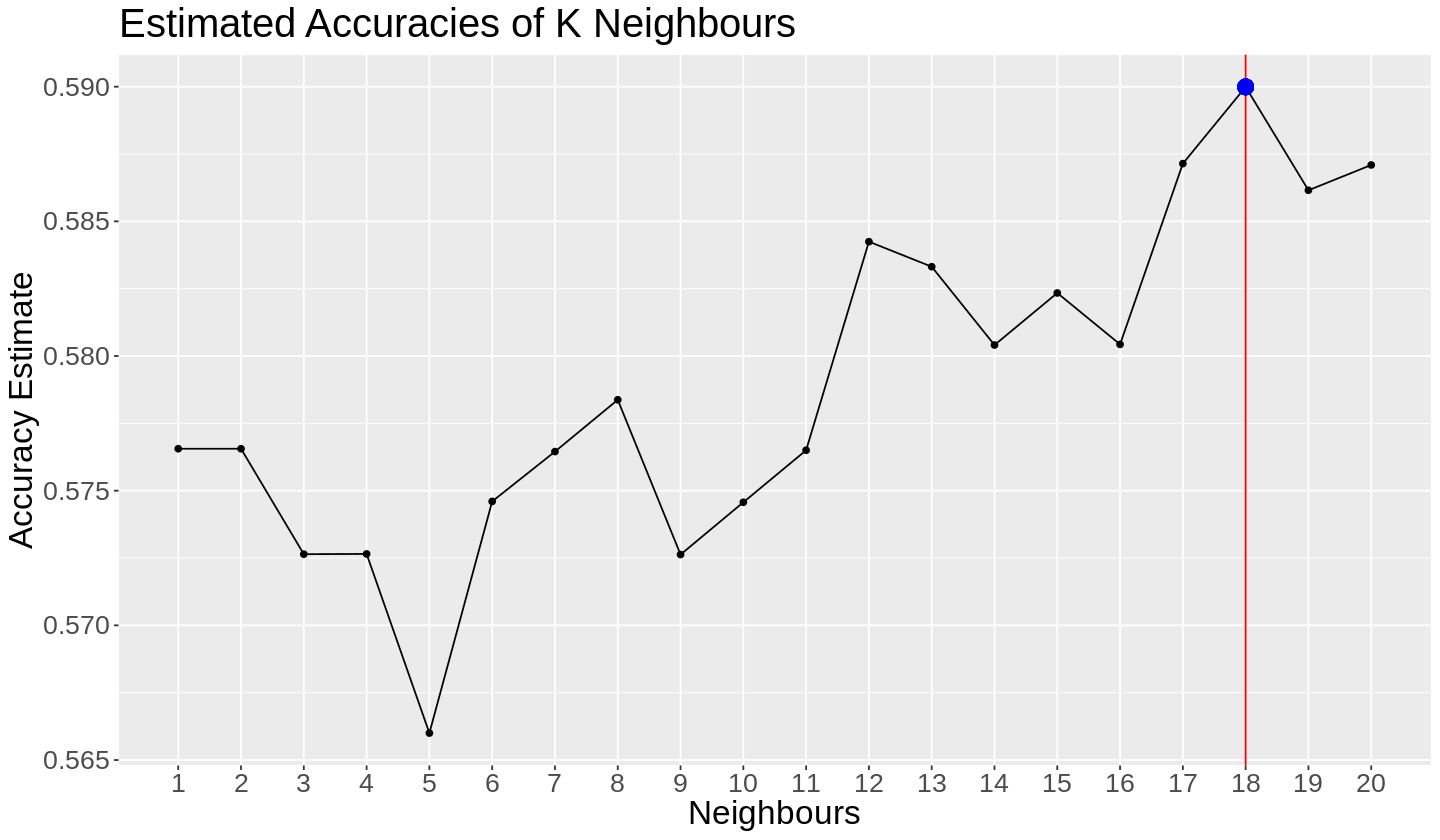

In [19]:
options(repr.plot.width = 12, repr.plot.height = 7)

## Get the best mean value from K = 18 ##
best_mean <- wine_results |>
    filter(neighbors == 18) |>
    select(mean) |>
    pull()
best_mean

## Generate line plot to better visualize the accuracy given by each neighbors ##
cross_val_plot <- wine_results |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    geom_vline(xintercept = 18, colour = "red") +
    geom_point(aes(x = 18, y = best_mean), size = 4, colour = "blue") +
    labs(x = "Neighbours",
         y = "Accuracy Estimate",
         title = "Estimated Accuracies of K Neighbours") +
    scale_x_continuous(limits = c(1, 20),
                       breaks = seq(1, 20),
                       minor_breaks = seq(1, 20, 1)) +
    theme(text = element_text(size = 20),
          plot.caption = element_text(size = 20, hjust = 0))

cross_val_plot

Based on the graph, the optimal K value is 18, with about 59% accuracy on the validation set.

In [20]:
## Build the classifier again with the best K observed on graph ##
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 18) |>
  set_engine("kknn") |>
  set_mode("classification")

## Add the recipe and new model specification to re-train the classifier ##
wine_fit <- workflow() |>
  add_recipe(upsampled_wine_recipe) |>
  add_model(knn_best_spec) |>
  fit(data = wine_train)

## Predict the test set ##
set.seed(1)
wine_predictions <- predict(wine_fit, wine_test) |> 
    bind_cols(wine_test)

**I. Compare the accuracy of predictions to the true values in the test set:**

In [25]:
wine_acc <- wine_predictions |> 
    metrics(truth = quality, estimate = .pred_class) |> 
    select(.metric, .estimate) |> 
    head(1)
wine_acc 
#64% accuracy

.metric,.estimate
<chr>,<dbl>
accuracy,0.6436782


**II. Compare the predictions to the true values in a confusion matrix:**

In [26]:
wine_cm <- wine_predictions |> 
    conf_mat(truth = quality, estimate = .pred_class)
wine_cm

          Truth
Prediction   3   4   5   6   7   8
         3   0   0   0   0   0   0
         4   0   0   0   0   0   0
         5   1   7 117  36   6   0
         6   1   4  34  95  24   2
         7   0   0   0   7  12   2
         8   0   0   0   0   0   0

**Discussion**

**Summarizing What We've Found**:

The initial goal of our project was to see if we could accurately determine the wine quality from red wine samples with only its four primary components, sulphates, pH, total sulfur dioxide, and alcohol. The reason being that if we can limit the amount of ingredients we use as predictors and still be able to accurately predict the wine quality, we could theoretically only use those four ingredients when predicting the quality of red wine, limiting the extra unnecessary background information. To accomplish this task, we used classification as the “wine quality score” is a categorical value. We went through the process of classification, firstly tidying our dataset, selecting only the relevant columns and then splitting the dataset into a training and testing set. We used the K-nearest neighbours algorithm with Tidymodels and also used cross validation to tune the accuracy of the classifier. This ultimately led to our classifier having an accuracy of around 60 percent. This result does not surprise our group as we anticipated that the classifier wouldn’t be able to accurately predict the quality of wine based on just those four predictors. The reason as to why we aren’t surprised with this outcome is due the fact that although we mentioned earlier those four ingredients were indeed the four most relevant ingredients when looking at wine quality, this doesn’t neglect the importance of the other ingredients. According to their study (Cortez et al. 2009), total sulfur dioxide and alcohol’s relevance score are not significantly higher than that of “volatile acidity”, “free sulfur dioxide” or the other ingredients present in the dataset. This lack of notable relevance potency makes it hard to use only those four ingredients as the basis for our predictors. The four ingredients on their own simply don’t give enough information, it would be hard for our classifier to accurately predict the quality of red wine samples solely based on just these predictors. 


**Potential Impact and Future Questions**: 

An accuracy of roughly 62 percent is not nearly effective enough to be relying on this method for consumers to use in predicting wine quality. However, that is not to say that these findings aren’t promising and relevant to the wine science domain. With this, we can see that there is definitely some dependency between physicochemical characterization and wine quality. As mentioned above, just four factors cannot predict the wine quality accurately because their relevance score is not significantly higher than those for the other ingredients. However, with more work and further research into this subject, if an accurate and more trustworthy model with better predictors can be developed, this could have an array of applications. For one, we will not be relying on the relative and inconsistent sensory analysis of tasters to predict wine quality and can predict it based on a consistent algorithmic model. This in turn will reduce the scope for human error and other subjective factors. This would also mean a reduction in the wine producers' work, offering a more efficient process for wine quality analysis. Another application could be in improving the training of oenology students as they would have new access to more efficient models. And finally, the most relevant application of this proposed research would be in making the wine quality itself better. This can occur in two different ways. The first example being, one might want to increase or decrease the alcohol concentration by monitoring the grape sugar concentration prior to the harvest in order to yield good quality wine. The second example being, if consumers had a reliable method of checking the quality of the wine they bought, this would force producers to be more discreet with their marketing, decreasing the amount of misled consumers who may think they are buying something of quality when in reality they aren't. A subset of this application is the benefit the consumers would have if they could reliably predict the quality of wine just by looking at the ingredients’ label. The exploration of our project could even lead to the future question of “is it ethical for companies to advertise a product’s quality when consumers do not possess the means of accurately verifying it?”



**Conclusion**: 

Therefore, as seen in our findings, an accuracy of roughly 60 percent has very little credibility with real-world applications. However, this number in itself is reason to be excited and should spark further research into this topic. If an accurate model with the right predictors can be achieved, the potential implications and upside to both wineries and consumers will be enticingly promising.  

**References**: 


*Paulo Cortez, Antonio Cerdeira, Fernanda Almeida, Telmo Matos, José Reis. “Modeling wine preferences by data mining from physicochemical properties” Decision Support Systems vol 47 issue 4, June 2009, Pages 547-553*  

(Article)
https://www.sciencedirect.com/science/article/pii/S0167923609001377?via%3Dihub 

(Dataset)
https://archive.ics.uci.edu/ml/datasets/Student+Performance 


*Jan Conway, “Wine consumption worldwide from 2000 to 2021”, Statista.com, July 2022* 

https://www.statista.com/statistics/232937/volume-of-global-wine-consumption/ 


